## Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

import re
import scipy.stats as stats


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from geopy.geocoders import Nominatim

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read the dataset

In [289]:
data = pd.read_excel("Data_Train.xlsx")
df = pd.DataFrame(data)

### Data preprocessing

In [290]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [90]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1049,Vistara,24/05/2019,Kolkata,Banglore,CCU → DEL → BLR,07:10,18:50,11h 40m,1 stop,No info,9555
8075,Jet Airways,27/05/2019,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,No info,7229
5401,Air India,21/04/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,6245
4008,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 02 Jun,22h,2 stops,No info,13376
9810,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,19:00 19 May,29h 35m,2 stops,No info,15129


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [92]:
df.duplicated().sum()

220

In [291]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [94]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [95]:
df.describe(include="object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4346,4346,2376,233,412,544,5625,8183


In [96]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<Axes: >

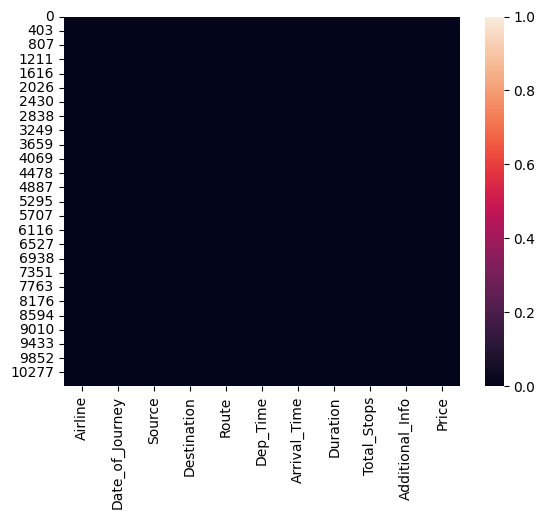

In [97]:
sns.heatmap(df.isnull())

In [98]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [292]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


Text(0, 0.5, 'Price')

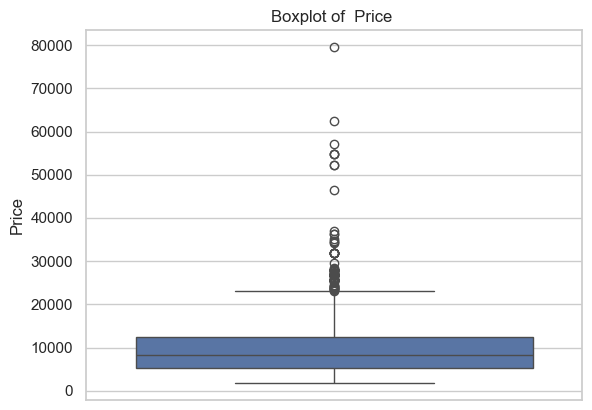

In [293]:
sns.boxplot(y=df["Price"])
plt.title("Boxplot of  Price ")
plt.ylabel("Price")

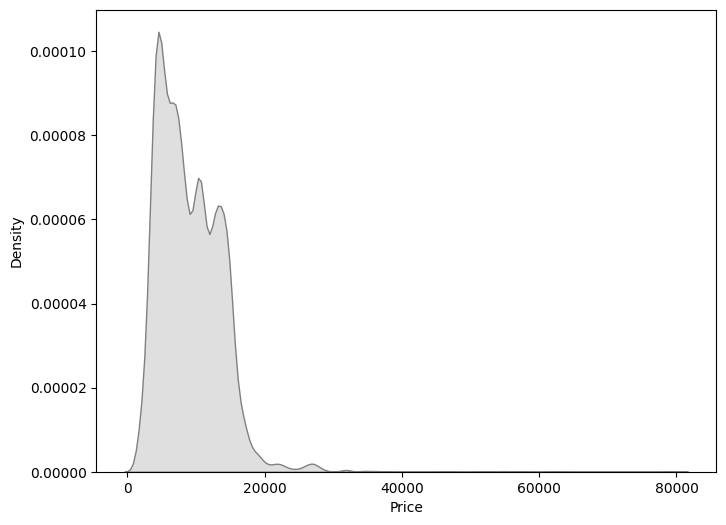

In [102]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df["Price"], color="grey", ax=ax, shade=True)
plt.show()

In [103]:
df[df["Price"] > 20000].count()

Airline            148
Date_of_Journey    148
Source             148
Destination        148
Route              148
Dep_Time           148
Arrival_Time       148
Duration           148
Total_Stops        148
Additional_Info    148
Price              148
dtype: int64

In [294]:
z_scores = np.abs(stats.zscore(df["Price"]))
outliers_z = np.where(z_scores > 3)
print("Outliers based on Z-scores:", outliers_z)

Outliers based on Z-scores: (array([  123,   396,   486,   510,   597,   628,   657,   784,   825,
         935,   945,   958,   974,  1194,  1244,  1339,  1420,  1462,
        1474,  1625,  1650,  1778,  1909,  2044,  2087,  2096,  2483,
        2543,  2604,  2621,  2677,  2904,  3010,  3088,  3231,  3372,
        3505,  3667,  3974,  4476,  4627,  4779,  4960,  5080,  5312,
        5378,  5597,  5636,  5645,  5654,  5673,  5680,  5789,  5916,
        6240,  6332,  6497,  6509,  6526,  6902,  7254,  7259,  7280,
        7438,  7455,  7516,  7609,  7620,  7650,  7795,  7910,  7968,
        8326,  8345,  8409,  8467,  8717,  8798,  8815,  8846,  8875,
        9039,  9082,  9456,  9537,  9786,  9863,  9921,  9966,  9988,
        9994, 10148, 10159, 10178, 10231, 10301], dtype=int64),)


In [295]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 7 * IQR
upper_bound = Q3 + 7 * IQR

# Identify outliers
outliers_iqr = np.where((df["Price"] < lower_bound) | (df["Price"] > upper_bound))

print("Outliers based on IQR:", outliers_iqr)

Outliers based on IQR: (array([2904, 5312], dtype=int64),)


In [296]:
df["Price"] = df["Price"].apply({lambda x: x if x <= upper_bound else upper_bound})

Text(0, 0.5, 'Price')

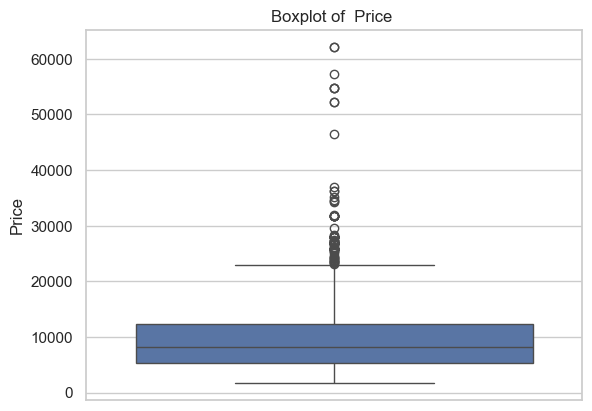

In [297]:
sns.boxplot(y=df["Price"])
plt.title("Boxplot of  Price ")
plt.ylabel("Price")

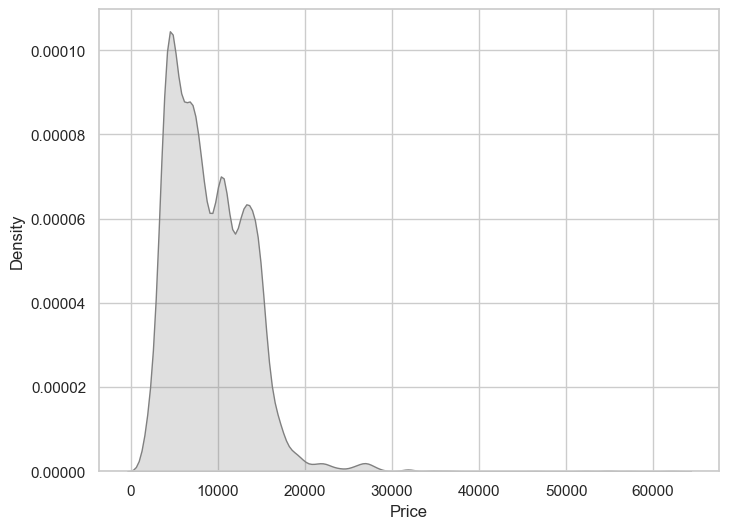

In [298]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df["Price"], color="grey", ax=ax, shade=True)
plt.show()

In [299]:
df.drop("Price2", axis=1, inplace=True)

KeyError: "['Price2'] not found in axis"

In [300]:
min, max = df["Price"].agg(["min", "max"])

In [301]:
interval = pd.interval_range(start=min, freq=10000, end=max)
interval

IntervalIndex([ (1759.0, 11759.0], (11759.0, 21759.0], (21759.0, 31759.0],
               (31759.0, 41759.0], (41759.0, 51759.0], (51759.0, 61759.0]],
              dtype='interval[float64, right]')

In [302]:
interval = [1759.0, 11759.0, 21759.0, 31759.0, 41759.0, 51759.0, 61759.0]

In [303]:
labels = [
    "First_Class",
    "Second_Class",
    "Third_Class",
    "Forth_Class",
    "Five_Class",
    "Six_Class",
]

labels.reverse()

In [304]:
assert len(interval) - 1 == len(labels)

df["Price_Group"] = pd.cut(
    df["Price"], bins=interval, labels=labels, include_lowest=True
)

price_group_counts = df["Price_Group"].value_counts()
print(price_group_counts)

Price_Group
Six_Class       7586
Five_Class      2755
Forth_Class       97
Third_Class       15
First_Class        6
Second_Class       1
Name: count, dtype: int64


<Axes: xlabel='Price_Group', ylabel='Price'>

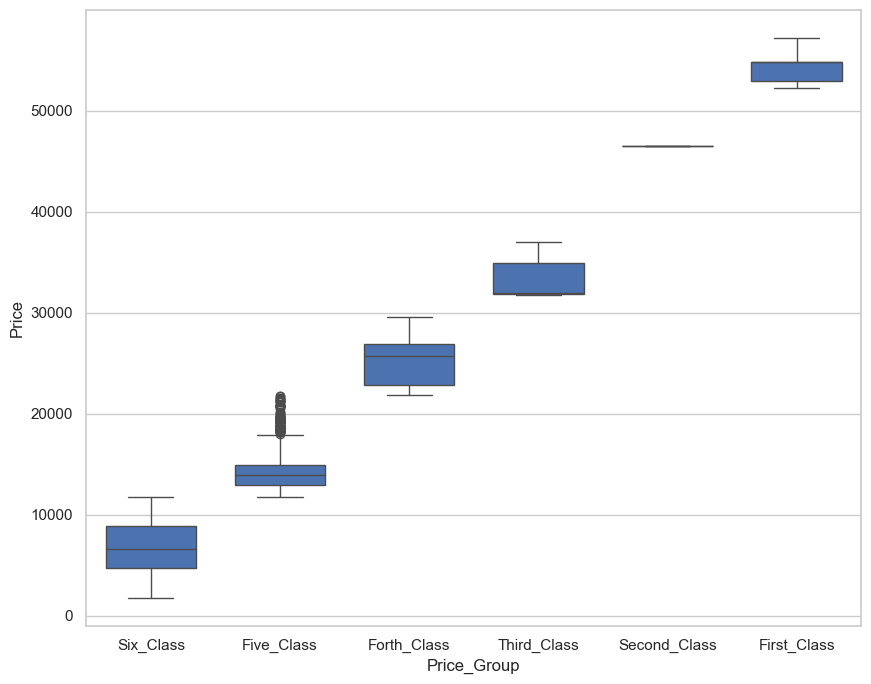

In [305]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df["Price_Group"], y=df["Price"], saturation=2, width=0.7)

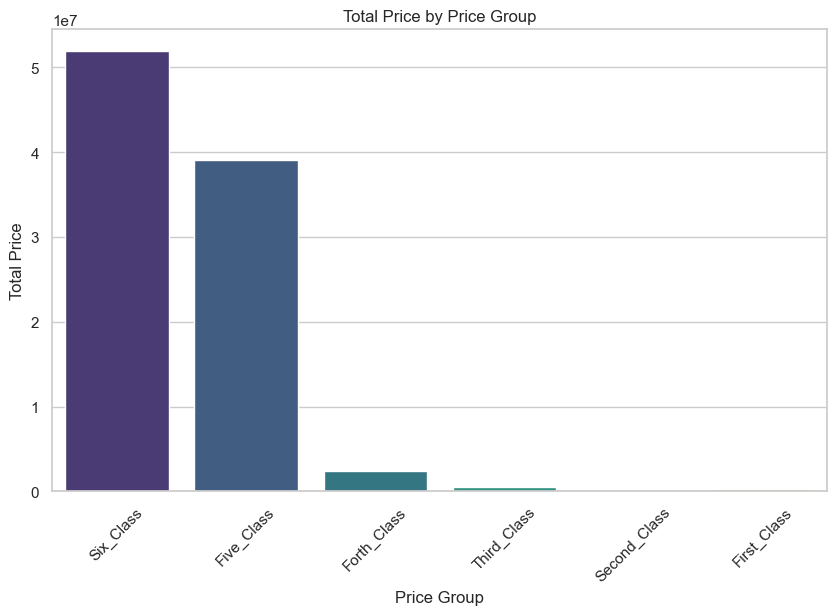

In [306]:
price_group_sum = df.groupby("Price_Group")["Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Price_Group",
    y="Price",
    data=price_group_sum,
    palette="viridis",
)

plt.title(
    "Total Price by Price Group",
)
plt.xlabel(
    "Price Group",
)
plt.ylabel(
    "Total Price",
)
plt.xticks(
    rotation=45,
)

# Show the plot
plt.show()

In [307]:
price_sum_by_airline = df.groupby("Airline")["Price"].sum()
price_sum_by_airline

Airline
Air Asia                              1783293.0
Air India                            16188894.0
GoAir                                 1137045.0
IndiGo                               11580684.0
Jet Airways                          42916378.0
Jet Airways Business                   332593.0
Multiple carriers                    13039603.0
Multiple carriers Premium economy      148445.0
SpiceJet                              3533711.0
Trujet                                   4140.0
Vistara                               3729048.0
Vistara Premium economy                 26887.0
Name: Price, dtype: float64

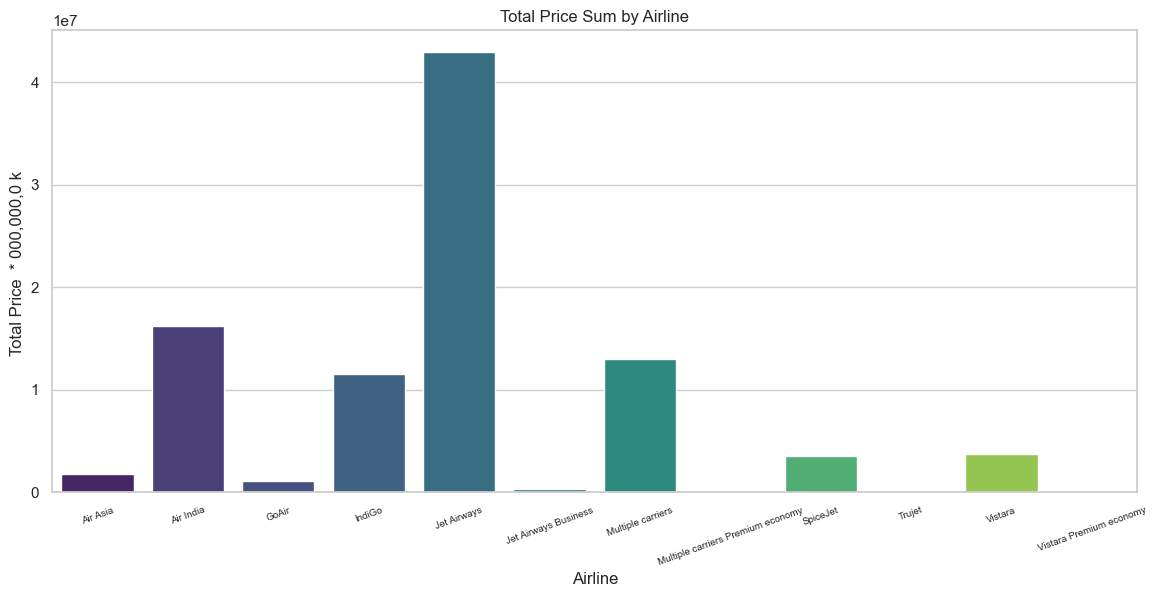

In [308]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x=price_sum_by_airline.index,
    y=price_sum_by_airline.values.astype(int),
    palette="viridis",
)

plt.title("Total Price Sum by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Price  * 000,000,0 k ")
plt.xticks(rotation=20, fontsize=7)

# Show the plot
plt.show()

In [309]:
total_stop_by_price = df.groupby("Total_Stops")[["Price"]].sum()
total_stop_by_price

,Price
Total_Stops,
1 stop,59574386.0
2 stops,16819129.0
3 stops,570209.0
4 stops,17686.0
non-stop,17439311.0


<Axes: xlabel='Total_Stops'>

<Figure size 1200x800 with 0 Axes>

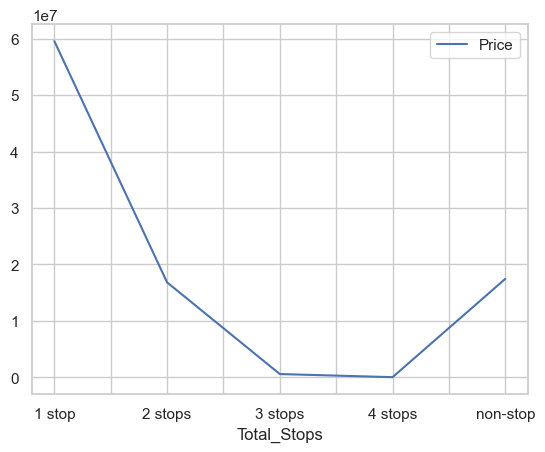

In [310]:
plt.figure(figsize=(12, 8))
total_stop_by_price = df.groupby("Total_Stops")[["Price"]].sum().plot(kind="line")
total_stop_by_price

In [311]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Price_Group'],
      dtype='object')

In [312]:
Additional_Info_by_Price = df.groupby("Additional_Info")["Price"].sum()
Additional_Info_by_Price.index

Index(['1 Long layover', '1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object', name='Additional_Info')

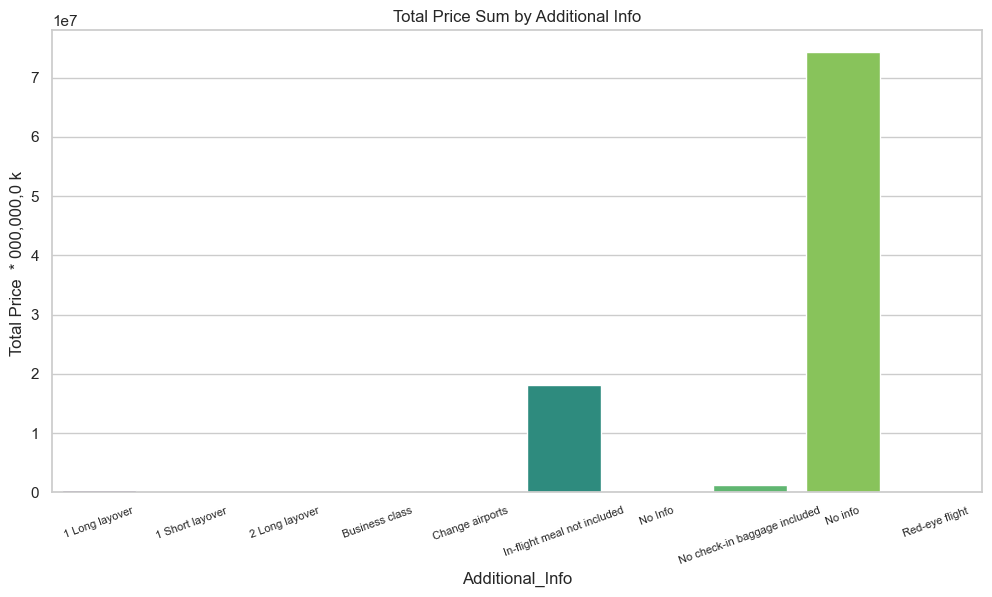

In [313]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=Additional_Info_by_Price.index,
    y=Additional_Info_by_Price.values,
    palette="viridis",
)

plt.title("Total Price Sum by Additional Info")
plt.xlabel("Additional_Info")
plt.ylabel("Total Price  * 000,000,0 k ")
plt.xticks(rotation=20, fontsize=8)

# Show the plot
plt.show()

In [314]:
df["Dep_Time"].sample(5)

10243    20:55
9322     17:15
154      20:00
5899     05:55
7579     09:00
Name: Dep_Time, dtype: object

In [315]:
df.rename(columns={"Dep_Time": "Start_Time"}, inplace=True)

In [316]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Price_Group'],
      dtype='object')

In [317]:
df["Arrival_Time"].sample(5)

7789           13:00
8039    01:30 25 Jun
8462           19:00
4009    12:00 25 Mar
4692           21:00
Name: Arrival_Time, dtype: object

In [318]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")

In [319]:
def extract_time_and_date(row):
    if " " in row["Arrival_Time"]:
        time_part, date_part = row["Arrival_Time"].split(" ", 1)
        date_part = pd.to_datetime(
            date_part + " " + str(row["Date_of_Journey"].year), format="%d %b %Y"
        )
    else:
        time_part = row["Arrival_Time"]
        date_part = row["Date_of_Journey"]

    return pd.Series([time_part, date_part])


df[["Arrival_Time", "Arrival_Date"]] = df.apply(extract_time_and_date, axis=1)

In [320]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Start_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price_Group,Arrival_Date
8589,Air India,2019-05-24,Delhi,Cochin,DEL → COK,14:10,17:10,3h,non-stop,No info,6934.0,Six_Class,2019-05-24
8254,Jet Airways,2019-03-24,Kolkata,Banglore,CCU → BOM → BLR,16:55,09:15,16h 20m,1 stop,In-flight meal not included,11134.0,Six_Class,2019-03-25
6899,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,9h,1 stop,No info,14714.0,Five_Class,2019-06-06
7459,Jet Airways,2019-03-24,Kolkata,Banglore,CCU → BOM → BLR,21:10,20:40,23h 30m,1 stop,No info,13759.0,Five_Class,2019-03-25
57,Vistara,2019-03-06,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,7414.0,Six_Class,2019-03-06


In [321]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Price_Group', 'Arrival_Date'],
      dtype='object')

In [322]:
df = df[
    [
        "Airline",
        "Date_of_Journey",
        "Source",
        "Destination",
        "Route",
        "Start_Time",
        "Arrival_Time",
        "Arrival_Date",
        "Duration",
        "Total_Stops",
        "Additional_Info",
        "Price",
    ]
]

In [323]:
def convert_duration_to_time(duration):
    hours = 0
    minutes = 0

    hours_match = re.search(r"(\d+)h", duration)
    minutes_match = re.search(r"(\d+)m", duration)

    if hours_match:
        hours = int(hours_match.group(1))
    if minutes_match:
        minutes = int(minutes_match.group(1))

    total_minutes = hours * 60 + minutes
    return f"{total_minutes // 60:02d}:{total_minutes % 60:02d}"


df["Duration"] = df["Duration"].apply(convert_duration_to_time)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Start_Time       10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Arrival_Date     10462 non-null  datetime64[ns]
 8   Duration         10462 non-null  object        
 9   Total_Stops      10462 non-null  object        
 10  Additional_Info  10462 non-null  object        
 11  Price            10462 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 1.0+ MB


In [325]:
print(df["Source"].unique())
print(df["Destination"].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [326]:
df["Airline"].count()

10462

In [327]:
source_destination_by_airline = df.groupby(["Source", "Destination"])["Airline"].count()
source_destination_by_price = df.groupby(["Source", "Destination"])["Price"].sum()
print(source_destination_by_airline)
print("-" * 20)
print(source_destination_by_price)

Source    Destination
Banglore  Delhi          1265
          New Delhi       914
Chennai   Kolkata         381
Delhi     Cochin         4345
Kolkata   Banglore       2860
Mumbai    Hyderabad       697
Name: Airline, dtype: int64
--------------------
Source    Destination
Banglore  Delhi           6507057.0
          New Delhi      10957224.0
Chennai   Kolkata         1824949.0
Delhi     Cochin         45455655.0
Kolkata   Banglore       26149219.0
Mumbai    Hyderabad       3526617.0
Name: Price, dtype: float64


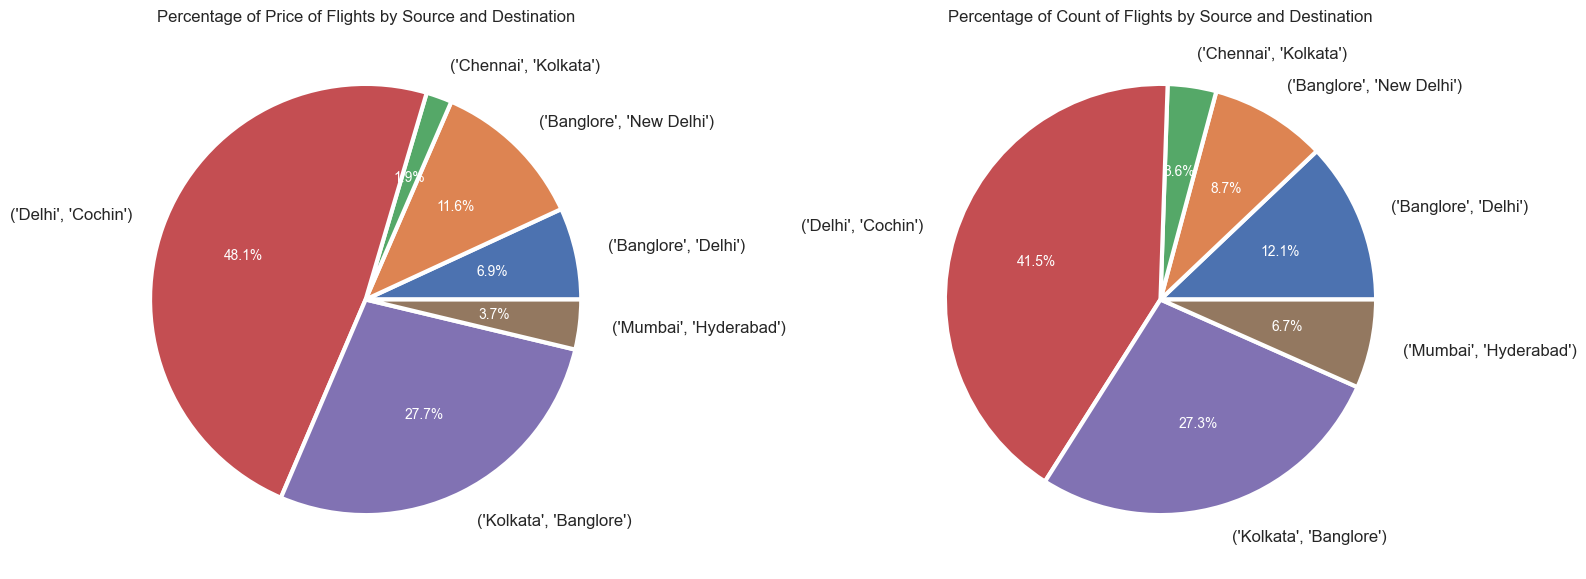

In [328]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))

# Pie chart for price
wedges1, texts1, autotexts1 = ax1.pie(
    source_destination_by_price.values,
    labels=source_destination_by_price.index,
    labeldistance=1.15,
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
    autopct="%1.1f%%",
)

# Format the text labels for percentages in the price pie chart
for autotext in autotexts1:
    autotext.set_color("white")  # Set the color of the percentage text

for text in texts1:
    text.set_fontsize(12)
for autotext in autotexts1:
    autotext.set_fontsize(10)

ax1.set_title("Percentage of Price of Flights by Source and Destination")

# Pie chart for airline count
wedges2, texts2, autotexts2 = ax2.pie(
    source_destination_by_airline.values,
    labels=source_destination_by_airline.index,
    labeldistance=1.15,
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
    autopct="%1.1f%%",
)

# Format the text labels for percentages in the airline pie chart
for autotext in autotexts2:
    autotext.set_color("white")  # Set the color of the percentage text

for text in texts2:
    text.set_fontsize(12)
for autotext in autotexts2:
    autotext.set_fontsize(10)

ax2.set_title("Percentage of Count of Flights by Source and Destination")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

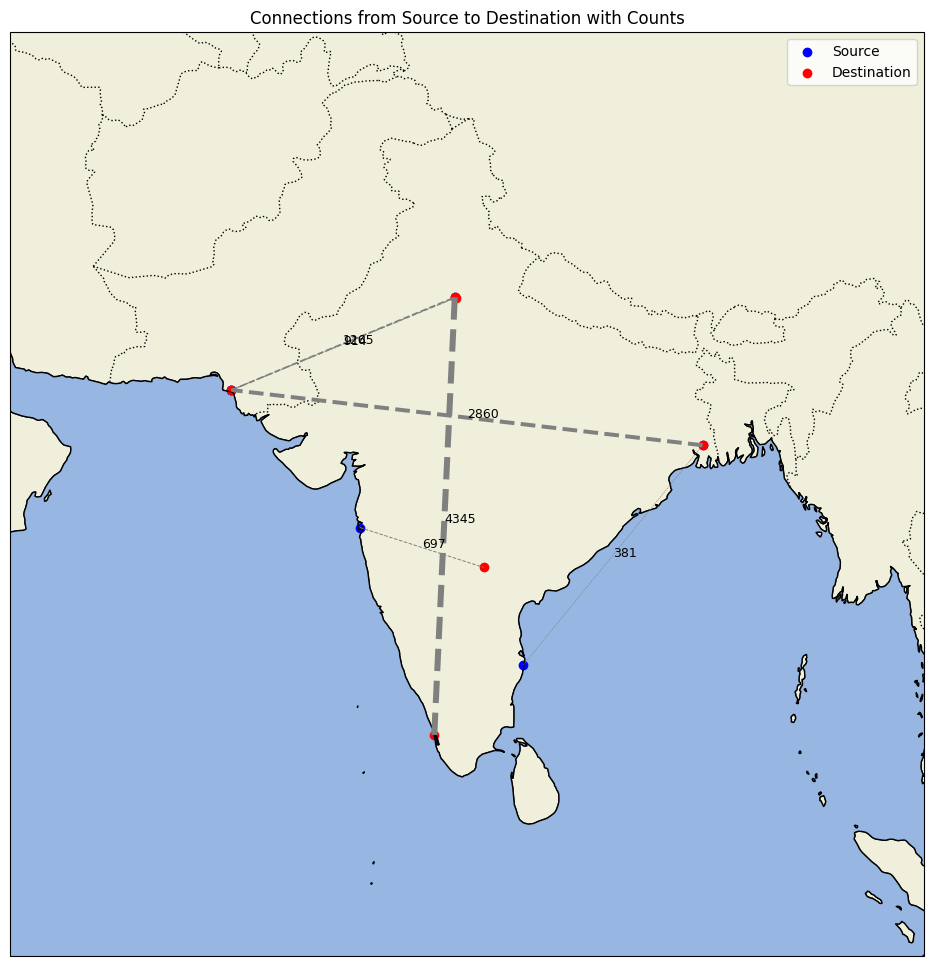

In [87]:
# Sample data with counts
data = {
    "Source": ["Banglore", "Banglore", "Chennai", "Delhi", "Kolkata", "Mumbai"],
    "Destination": ["Delhi", "New Delhi", "Kolkata", "Cochin", "Banglore", "Hyderabad"],
    "Count": [1265, 914, 381, 4345, 2860, 697],
}
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapiExercises")


def geocode_city(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return np.nan, np.nan


# Get coordinates for each city
coordinates = {}
for city in pd.concat([df["Source"], df["Destination"]]).unique():
    coordinates[city] = geocode_city(city)

# Separate coordinates into lists for sources and destinations
source_lats, source_lons = zip(*[coordinates[city] for city in df["Source"]])
destination_lats, destination_lons = zip(
    *[coordinates[city] for city in df["Destination"]]
)
counts = df["Count"]

# Create a map with Cartopy
fig, ax = plt.subplots(figsize=(15, 12), subplot_kw={"projection": ccrs.Mercator()})
ax.set_extent(
    [
        np.min(source_lons + destination_lons) - 10,
        np.max(source_lons + destination_lons) + 10,
        np.min(source_lats + destination_lats) - 10,
        np.max(source_lats + destination_lats) + 10,
    ],
    crs=ccrs.PlateCarree(),
)

ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Plot source and destination points
ax.scatter(
    source_lons,
    source_lats,
    color="blue",
    marker="o",
    label="Source",
    transform=ccrs.PlateCarree(),
)
ax.scatter(
    destination_lons,
    destination_lats,
    color="red",
    marker="o",
    label="Destination",
    transform=ccrs.PlateCarree(),
)

# Draw lines connecting sources to destinations with counts as line widths
for lon1, lat1, lon2, lat2, count in zip(
    source_lons, source_lats, destination_lons, destination_lats, counts
):
    ax.plot(
        [lon1, lon2],
        [lat1, lat2],
        color="gray",
        linestyle="--",
        linewidth=count / 1000,  # Adjust this factor to make the lines visible
        transform=ccrs.PlateCarree(),
    )
    ax.text(
        (lon1 + lon2) / 2,
        (lat1 + lat2) / 2,
        str(count),
        fontsize=9,
        color="black",
        transform=ccrs.PlateCarree(),
    )

# Add legend and title
plt.legend()
plt.title("Connections from Source to Destination with Counts")
plt.show()

In [329]:
def replace(row):
    if row["Total_Stops"] == "non-stop":
        return 0
    elif row["Total_Stops"] == "1 stop":
        return 1
    elif row["Total_Stops"] == "2 stops":
        return 2
    elif row["Total_Stops"] == "3 stops":
        return 3
    elif row["Total_Stops"] == "4 stops":
        return row["Total_Stops"].split(" ")[0]


df["Total_Stops"] = df.apply(replace, axis=1)

In [330]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Start_Time,Arrival_Time,Arrival_Date,Duration,Total_Stops,Additional_Info,Price
952,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,14:00,04:25,2019-06-04,14:25,1,In-flight meal not included,10262.0
4214,SpiceJet,2019-06-06,Chennai,Kolkata,MAA → CCU,08:20,10:35,2019-06-06,02:15,0,No check-in baggage included,3543.0
556,Vistara,2019-05-09,Delhi,Cochin,DEL → COK,14:40,17:50,2019-05-09,03:10,0,No info,6216.0
1255,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,18:55,10:05,2019-05-10,15:10,1,No info,13941.0
4241,Jet Airways,2019-06-03,Banglore,Delhi,BLR → DEL,11:10,14:05,2019-06-03,02:55,0,No info,8016.0


In [168]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Arrival_Date', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [169]:
df["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

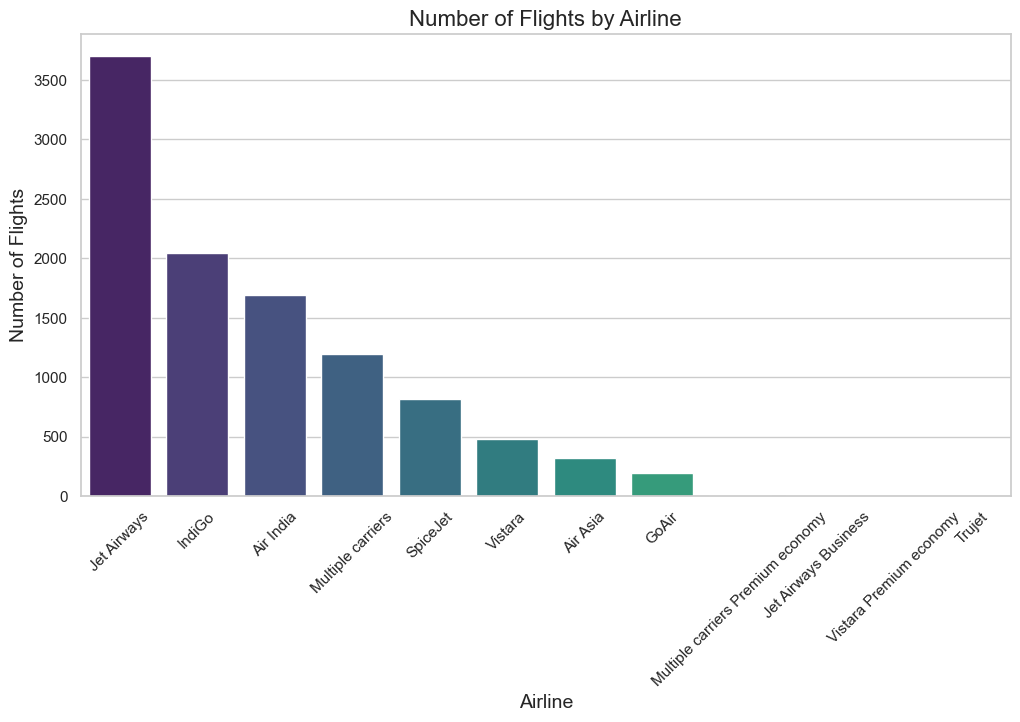

In [170]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df["Airline"].value_counts().index,
    y=df["Airline"].value_counts().values,
    palette="viridis",
)
plt.title("Number of Flights by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [171]:
df["Airline"].value_counts().values

array([3700, 2043, 1694, 1196,  815,  478,  319,  194,   13,    6,    3,
          1], dtype=int64)

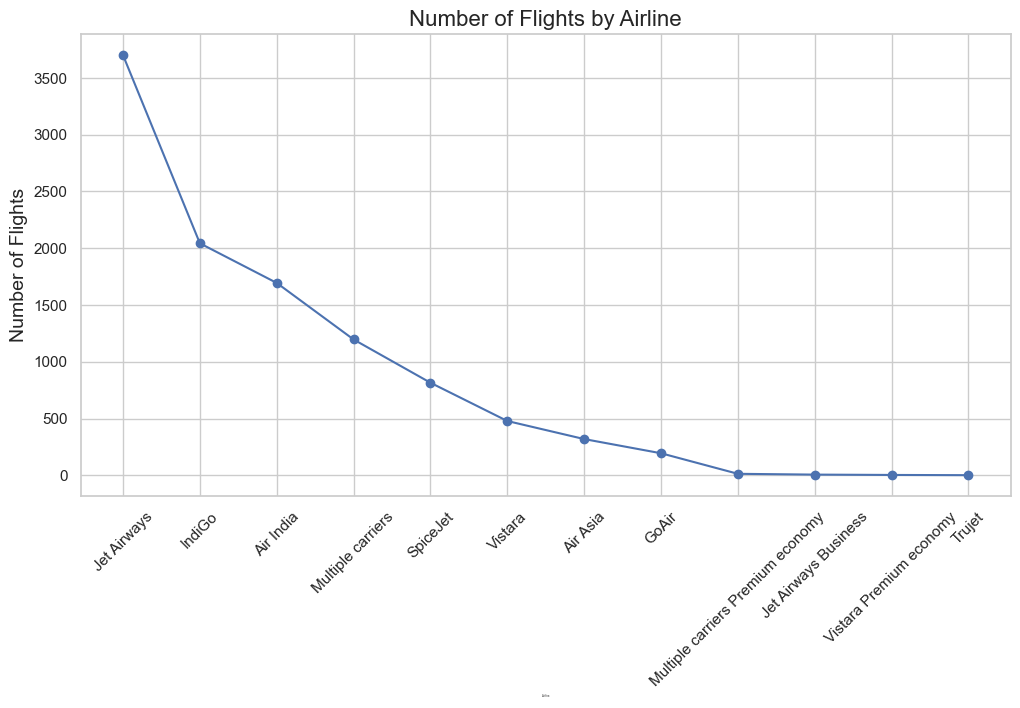

In [172]:
airline_counts = df["Airline"].value_counts().reset_index()
airline_counts.columns = ["Airline", "Count"]


plt.figure(figsize=(12, 6))
plt.plot(airline_counts["Airline"], airline_counts["Count"], linestyle="-", marker="o")
plt.title("Number of Flights by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=2)
plt.xticks(rotation=45)
plt.ylabel("Number of Flights", fontsize=14)
plt.show()

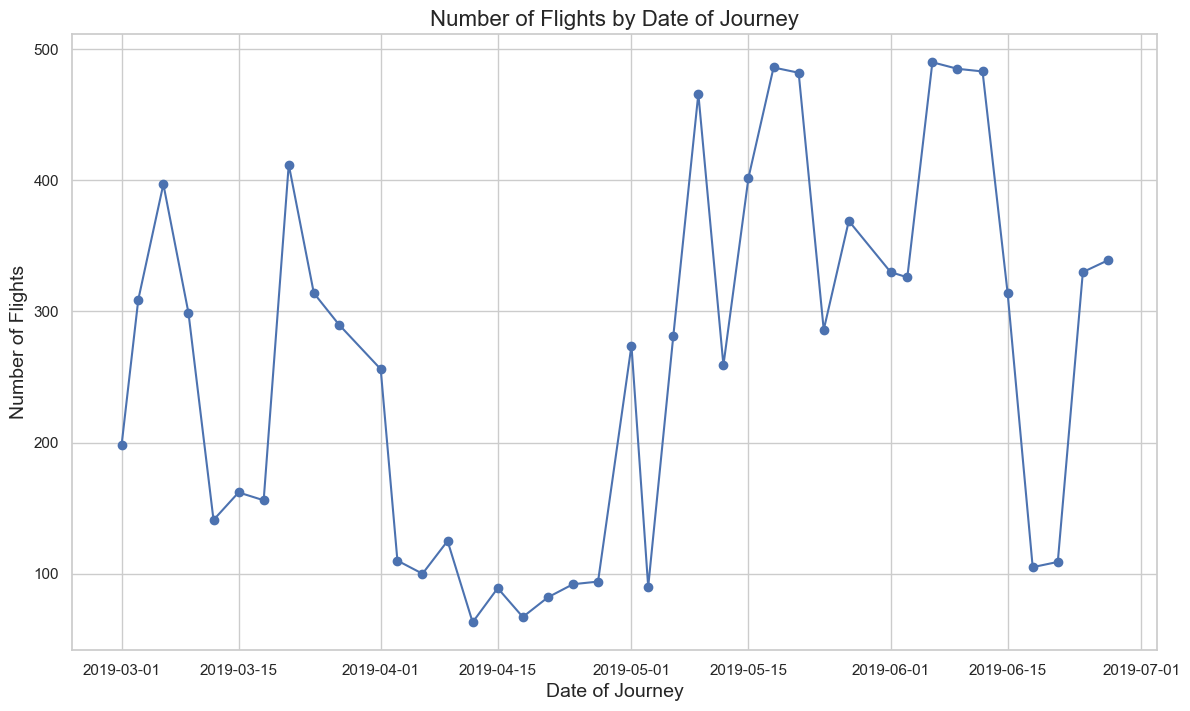

In [173]:
date_counts = df["Date_of_Journey"].value_counts().sort_index()


plt.figure(figsize=(14, 8))
plt.plot(date_counts.index, date_counts.values, linestyle="-", marker="o")
plt.title("Number of Flights by Date of Journey", fontsize=16)
plt.xlabel("Date of Journey", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

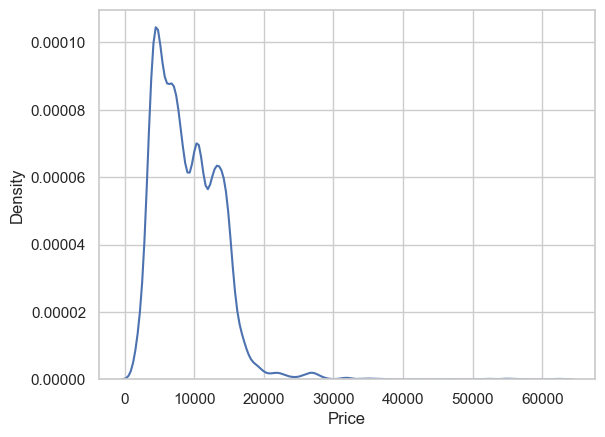

In [174]:
sns.kdeplot(df["Price"])

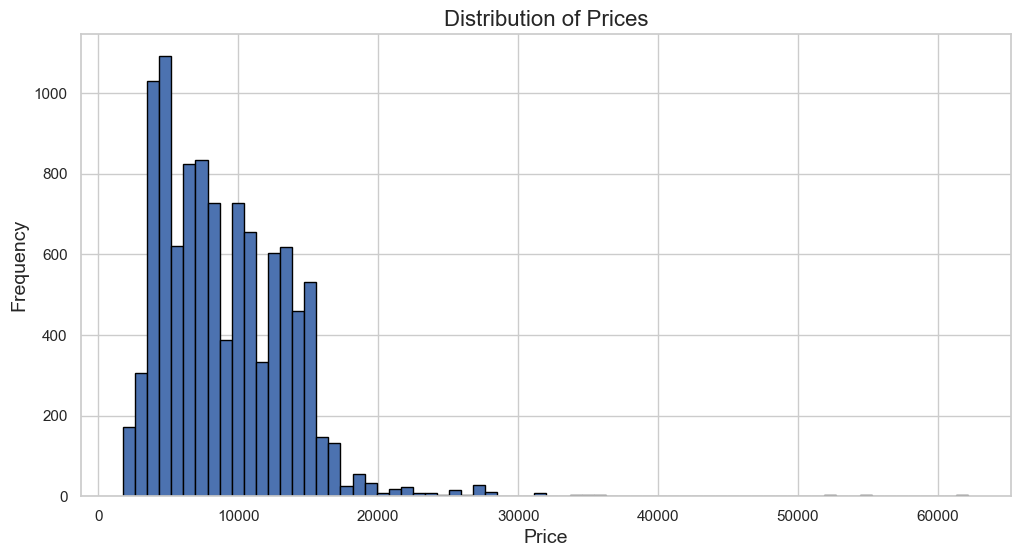

In [175]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.hist(df["Price"], bins=70, edgecolor="black")
ax.set_xlabel("Price", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Prices", fontsize=16)

# Show the plot
plt.show()

In [176]:
df["Destination"].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

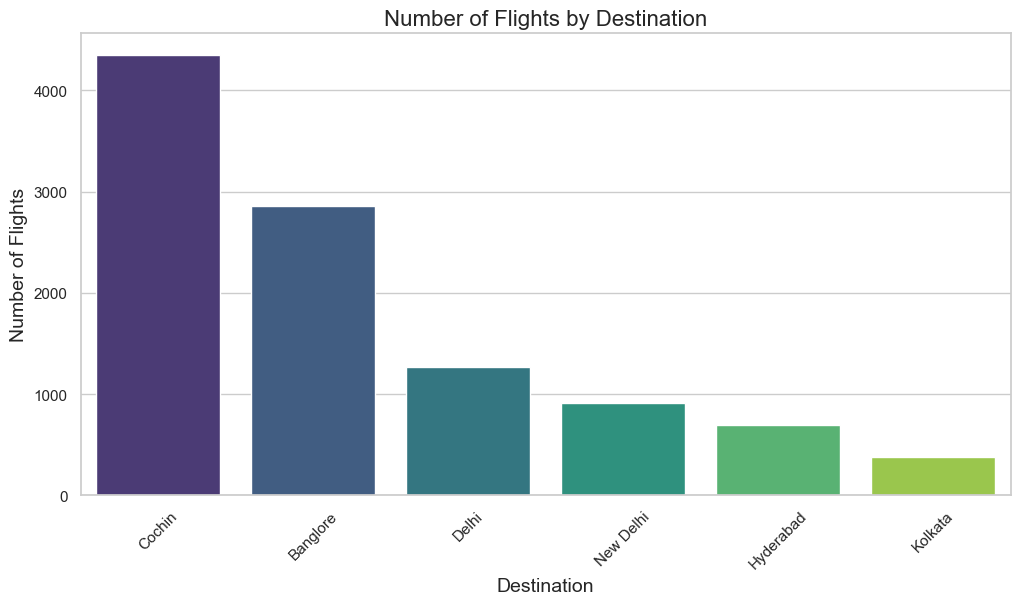

In [177]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df["Destination"].value_counts().index,
    y=df["Destination"].value_counts().values,
    palette="viridis",
)
plt.title("Number of Flights by Destination", fontsize=16)
plt.xlabel("Destination", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [178]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Arrival_Date', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [195]:
df["Total_Stops"] = df["Total_Stops"].astype(int)


stops_sum = df.groupby("Destination")["Total_Stops"].sum()

stops_sum

Destination
Banglore     2449
Cochin       5102
Delhi           0
Hyderabad     110
Kolkata         0
New Delhi     733
Name: Total_Stops, dtype: int32

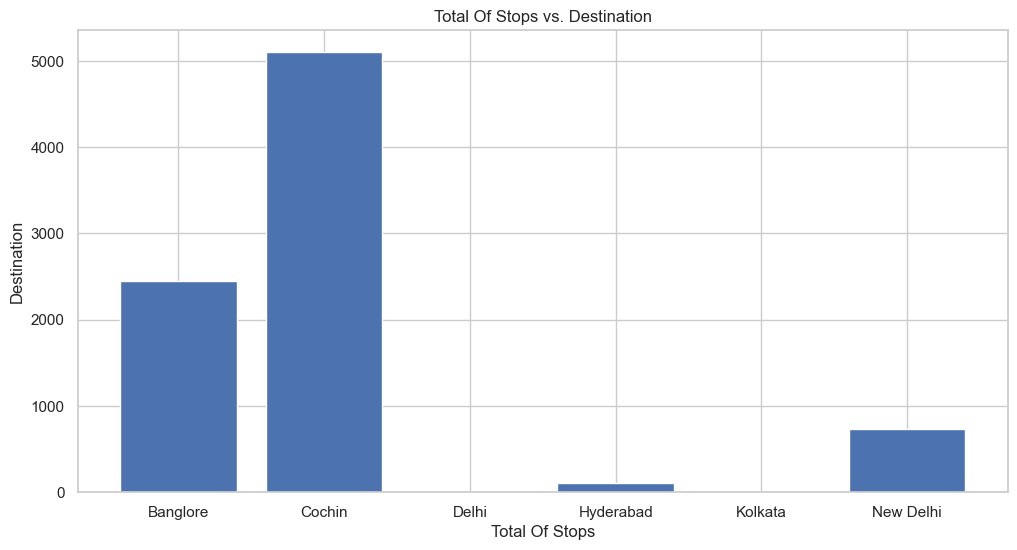

In [196]:
plt.figure(figsize=(12, 6))
plt.bar(stops_sum.index, stops_sum.values)
plt.title("Total Of Stops vs. Destination")
plt.xlabel("Total Of Stops")
plt.ylabel("Destination")
plt.show()

In [197]:
stops_sum_by_des_sou = df.groupby(["Destination", "Source"])["Total_Stops"].sum()
stops_sum_by_des_sou

Destination  Source  
Banglore     Kolkata     2449
Cochin       Delhi       5102
Delhi        Banglore       0
Hyderabad    Mumbai       110
Kolkata      Chennai        0
New Delhi    Banglore     733
Name: Total_Stops, dtype: int32

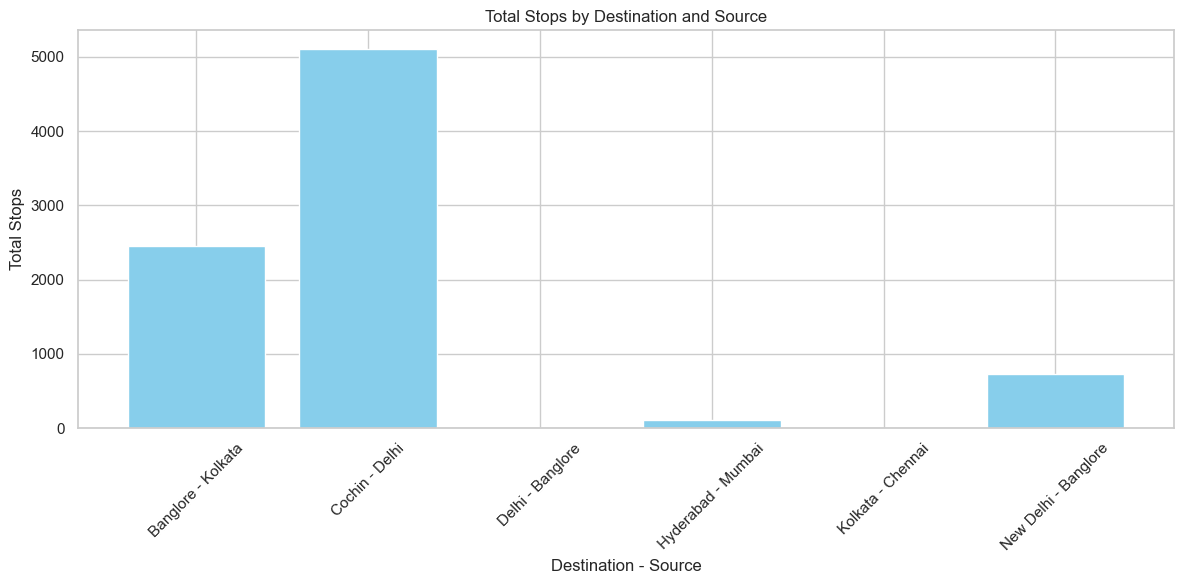

In [198]:
stops_sum_by_des_sou = stops_sum_by_des_sou.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(
    stops_sum_by_des_sou["Destination"] + " - " + stops_sum_by_des_sou["Source"],
    stops_sum_by_des_sou["Total_Stops"],
    color="skyblue",
)

plt.title("Total Stops by Destination and Source")
plt.xlabel("Destination - Source")
plt.ylabel("Total Stops")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [200]:
total_stop = df["Total_Stops"].value_counts()
total_stop

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

<Axes: xlabel='Duration'>

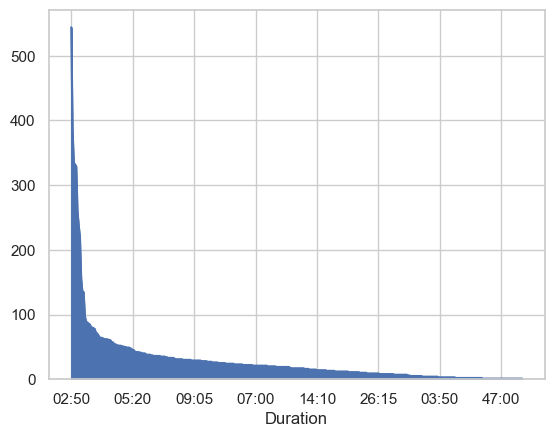

In [216]:
df["Duration"].value_counts().plot(kind="area")

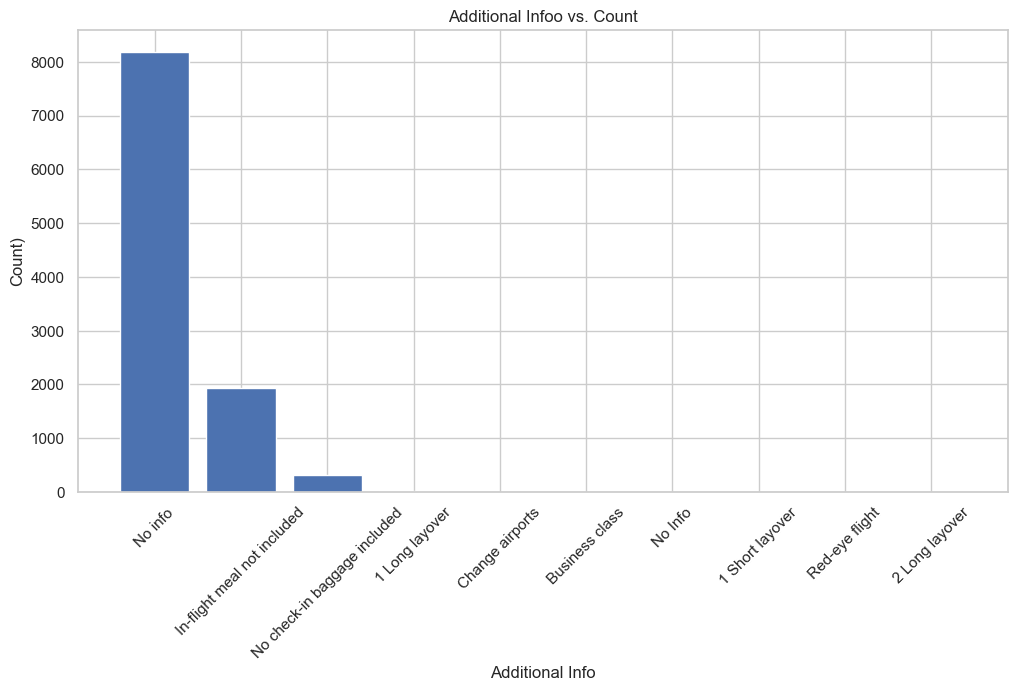

In [218]:
Additional_Info = df["Additional_Info"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(Additional_Info.index, Additional_Info.values)
plt.xticks(rotation=45)

plt.title("Additional Infoo vs. Count")
plt.xlabel("Additional Info")
plt.ylabel("Count)")
plt.show()

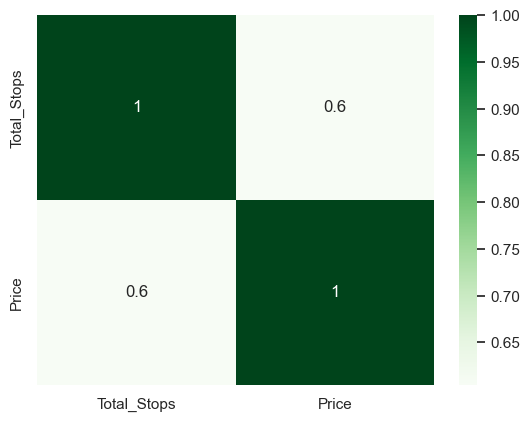

In [219]:
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), cmap="Greens", annot=True)
plt.show()

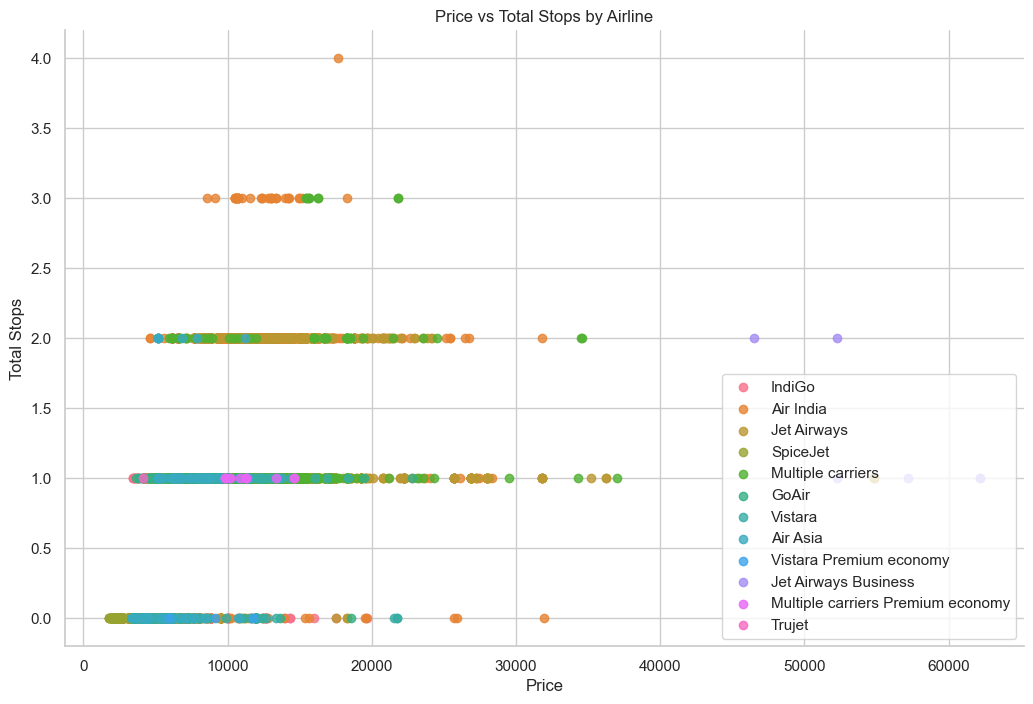

In [229]:
# Create the lmplot
g = sns.lmplot(
    x="Price",
    y="Total_Stops",
    data=df,
    fit_reg=False,
    hue="Airline",
    legend=False,
    height=7,
    aspect=1.5,
)

# Move the legend to an empty part of the plot
plt.legend(loc="lower right")

# Add labels and title
plt.ylabel("Total Stops")
plt.xlabel("Price")
plt.title("Price vs Total Stops by Airline")

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Arrival_Date', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_Stops_numeric'],
      dtype='object')

In [226]:
df.groupby(["Total_Stops", "Airline"])[["Price"]].sum()

Price
Total_Stops Airline                                      
0           Air Asia                             813112.0
            Air India                           2329830.0
            GoAir                                434808.0
            IndiGo                              5804000.0
            Jet Airways                         3839845.0
            SpiceJet                            2534628.0
            Vistara                             1656201.0
            Vistara Premium economy               26887.0
1           Air Asia                             913104.0
            Air India                           4882415.0
            GoAir                                702237.0
            IndiGo                              5634041.0
            Jet Airways                        31719799.0
            Jet Airways Business                 233818.0
            Multiple carriers                  12264457.0
            Multiple carriers Premium economy    148445.0
            SpiceJet                             999083.0
            Trujet                                 4140.0
            Vistara                             2072847.0
2           Air Asia                              57077.0
            Air India                           8527096.0
            IndiGo                               142643.0
            Jet Airways                         7356734.0
            Jet Airways Business                  98775.0
            Multiple carriers                    636804.0
3           Air India                            431867.0
            Multiple carriers                    138342.0
4           Air India                             17686.0

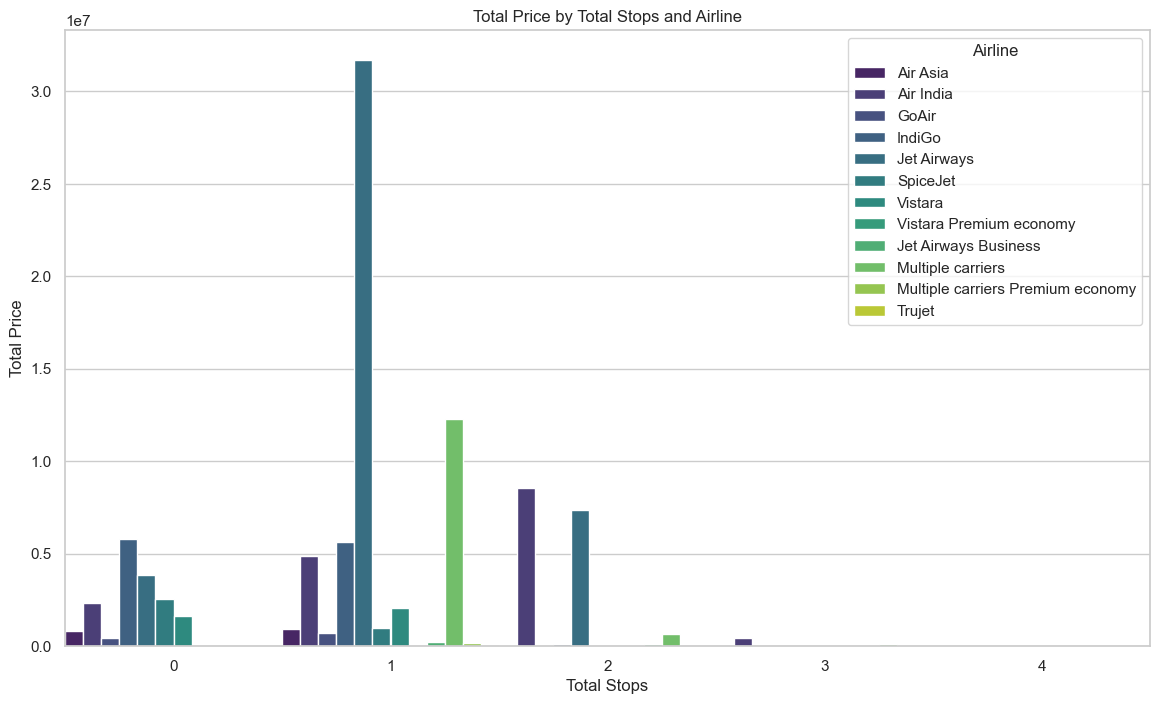

In [225]:
grouped_df = df.groupby(["Total_Stops", "Airline"])[["Price"]].sum().reset_index()

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_df,
    x="Total_Stops",
    y="Price",
    hue="Airline",
    palette="viridis",
    width=1,
)

# Add labels and title
plt.xlabel("Total Stops")
plt.ylabel("Total Price")
plt.title("Total Price by Total Stops and Airline")
plt.legend(loc="upper right", title="Airline")

# Show the plot
plt.show()

In [231]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Arrival_Date', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [234]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Start_Time,Arrival_Time,Arrival_Date,Duration,Total_Stops,Additional_Info,Price
2441,IndiGo,2019-03-15,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,2019-03-15,01:30,0,No info,4049.0
9519,Jet Airways,2019-06-24,Delhi,Cochin,DEL → IDR → BOM → COK,21:25,12:35,2019-06-25,15:10,2,In-flight meal not included,10199.0
7039,Air India,2019-06-21,Mumbai,Hyderabad,BOM → HYD,13:55,15:25,2019-06-21,01:30,0,No info,3100.0
3890,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,09:00,19:00,2019-06-03,10:00,1,No info,14714.0
3867,IndiGo,2019-05-24,Kolkata,Banglore,CCU → BLR,17:15,19:50,2019-05-24,02:35,0,No info,4804.0


In [239]:
min, max = df["Date_of_Journey"].agg(["min", "max"])
min
max

Timestamp('2019-06-27 00:00:00')

In [243]:
interval = pd.interval_range(start=min, freq="1MS", end=max)
interval

IntervalIndex([(2019-03-01 00:00:00, 2019-04-01 00:00:00],
               (2019-04-01 00:00:00, 2019-05-01 00:00:00],
               (2019-05-01 00:00:00, 2019-06-01 00:00:00]],
              dtype='interval[datetime64[ns], right]')

In [250]:
df["Date_of_Journey"].dt.month.value_counts()

Date_of_Journey
5    3395
6    3311
3    2678
4    1078
Name: count, dtype: int64

In [263]:
date_of_Journey = df.groupby(df["Date_of_Journey"].dt.month)["Price"].sum()
date_of_Journey

Date_of_Journey
3    28624715.0
4     6216336.0
5    30654269.0
6    28925401.0
Name: Price, dtype: float64

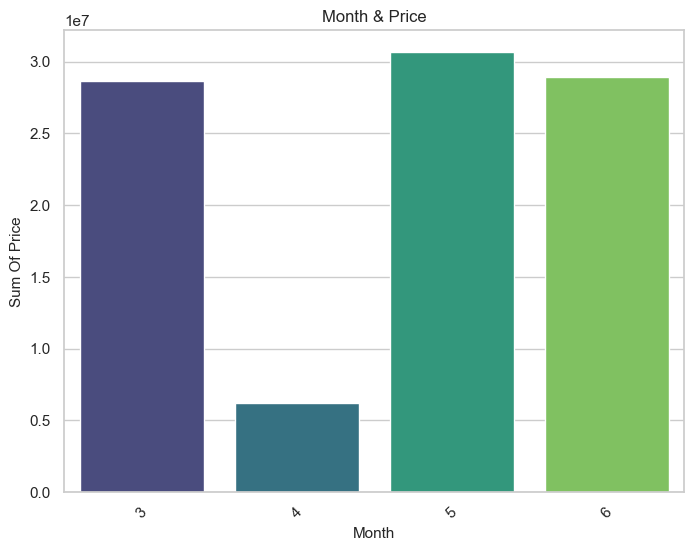

In [267]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    x=date_of_Journey.index,
    y=date_of_Journey.values.astype(int),
    palette="viridis",
)
plt.title("Month & Price", fontsize=12)
plt.xlabel("Month", fontsize=11)
plt.ylabel("Sum Of Price", fontsize=11)
plt.xticks(rotation=45)
plt.show()

In [334]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Start_Time', 'Arrival_Time', 'Arrival_Date', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [335]:
from sklearn.preprocessing import LabelEncoder

In [338]:
airline_le = LabelEncoder()
source_le = LabelEncoder()
destination_le = LabelEncoder()
route_le = LabelEncoder()
start_time_le = LabelEncoder()
arrival_time_le = LabelEncoder()
arrival_date_le = LabelEncoder()
total_stops_le = LabelEncoder()
additional_info_le = LabelEncoder()

# Fit and transform each categorical column
df["Airline"] = airline_le.fit_transform(df["Airline"])
df["Source"] = source_le.fit_transform(df["Source"])
df["Destination"] = destination_le.fit_transform(df["Destination"])
df["Route"] = route_le.fit_transform(df["Route"])
df["Start_Time"] = start_time_le.fit_transform(df["Start_Time"])
df["Arrival_Time"] = arrival_time_le.fit_transform(df["Arrival_Time"])
df["Arrival_Date"] = arrival_date_le.fit_transform(df["Arrival_Date"])
df["Additional_Info"] = additional_info_le.fit_transform(df["Additional_Info"])

# Print the DataFrame to see the encoded values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  int64         
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  int64         
 3   Destination      10462 non-null  int64         
 4   Route            10462 non-null  int64         
 5   Start_Time       10462 non-null  int64         
 6   Arrival_Time     10462 non-null  int64         
 7   Arrival_Date     10462 non-null  int64         
 8   Duration         10462 non-null  object        
 9   Total_Stops      10462 non-null  object        
 10  Additional_Info  10462 non-null  int32         
 11  Price            10462 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(2)
memory usage: 1021.7+ KB
None


In [351]:
df.head()

,Airline,Source,Route,Start_Time,Arrival_Time,Arrival_Date,Duration,Total_Stops,Additional_Info,Price
0,3,0,18,211,12,17,02:50,0,8,3897.0
1,1,3,84,31,104,44,07:25,2,8,7662.0
2,4,2,118,70,30,76,19:00,2,8,13882.0
3,3,3,91,164,217,53,05:25,1,8,6218.0
4,3,0,29,149,194,0,04:45,1,8,13302.0


In [355]:
df2 = df[
    [
        "Airline",
        "Source",
        "Route",
        "Start_Time",
        "Arrival_Time",
        "Arrival_Date",
        "Total_Stops",
        "Additional_Info",
        "Price",
    ]
]
df2

,Airline,Source,Route,Start_Time,Arrival_Time,Arrival_Date,Total_Stops,Additional_Info,Price
0,3,0,18,211,12,17,0,8,3897.0
1,1,3,84,31,104,44,2,8,7662.0
2,4,2,118,70,30,76,2,8,13882.0
3,3,3,91,164,217,53,1,8,6218.0
4,3,0,29,149,194,0,1,8,13302.0
...,...,...,...,...,...,...,...,...,...
10678,0,3,64,183,204,30,0,8,4107.0
10679,1,3,64,193,215,42,0,8,4145.0
10680,4,0,18,58,83,42,0,8,7229.0
10681,10,0,18,92,114,0,0,8,12648.0


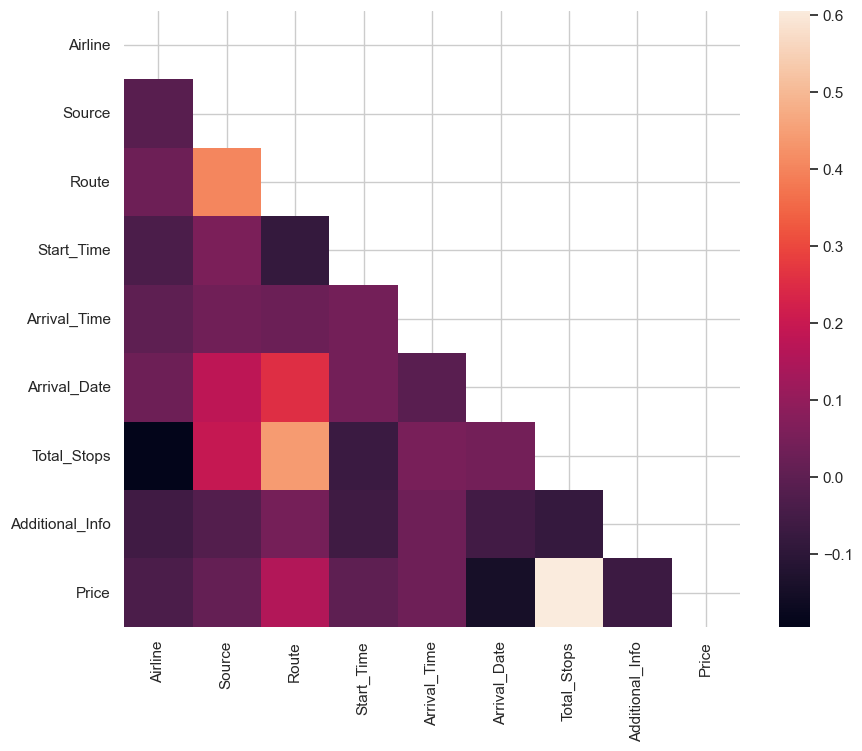

In [358]:
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)
plt.show()